# Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor, XGBRFRegressor

# Importing Dataset

In [2]:
raw_sales_data = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

# Data Preprocessing

In [3]:
raw_sales_data.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [4]:
raw_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [5]:
raw_sales_data.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [6]:
raw_sales_data['shipping_is_express'].value_counts()

0    1569
1       4
Name: shipping_is_express, dtype: int64

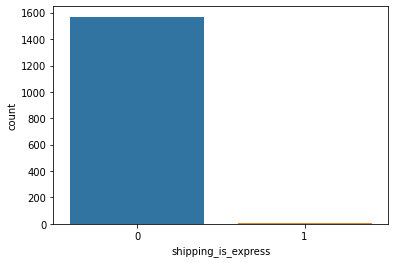

In [7]:
sns.countplot(x = raw_sales_data['shipping_is_express'])

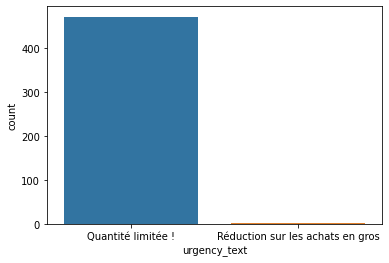

In [8]:
sns.countplot(raw_sales_data['urgency_text'])

In [9]:
raw_sales_data['shipping_option_name'].value_counts()

Livraison standard         1508
Standard Shipping            21
Envio Padrão                  9
Expediere Standard            6
Envío normal                  5
الشحن القياسي                 4
Livraison Express             3
Стандартная доставка          3
Standardversand               3
Standardowa wysyłka           3
Spedizione standard           2
การส่งสินค้ามาตรฐาน           2
Standart Gönderi              2
Ekspresowa wysyłka            1
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Name: shipping_option_name, dtype: int64

In [10]:
raw_sales_data['shipping_option_price'].value_counts()

2     619
3     520
1     308
4      76
5      32
6      12
7       5
12      1
Name: shipping_option_price, dtype: int64

In [11]:
raw_sales_data['urgency_text'].value_counts()

Quantité limitée !                  472
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

In [12]:
unnecessary_labels=['currency_buyer',
        'product_url',
        'merchant_name',
        'merchant_info_subtitle',
        'merchant_profile_picture',
        'merchant_has_profile_picture',
        'badges_count',
        'badge_local_product', 
        'badge_product_quality',
        'badge_fast_shipping',
        'product_picture',
        'title_orig',
        'theme',
        'tags',
        'product_variation_size_id',
        'product_url',
        'urgency_text',
        'product_picture',
        'merchant_title',
        'shipping_is_express',
        'shipping_option_name',
        'shipping_is_express',
        'merchant_name',
        'has_urgency_banner',
        'rating_five_count', 
        'rating_four_count', 
        'rating_three_count', 
        'rating_two_count', 
        'rating_one_count',
        'crawl_month',
        'title']
sales_data = raw_sales_data.drop(labels = unnecessary_labels,axis=1)

In [13]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        1573 non-null   float64
 1   retail_price                 1573 non-null   int64  
 2   units_sold                   1573 non-null   int64  
 3   uses_ad_boosts               1573 non-null   int64  
 4   rating                       1573 non-null   float64
 5   rating_count                 1573 non-null   int64  
 6   product_color                1532 non-null   object 
 7   product_variation_inventory  1573 non-null   int64  
 8   shipping_option_price        1573 non-null   int64  
 9   countries_shipped_to         1573 non-null   int64  
 10  inventory_total              1573 non-null   int64  
 11  origin_country               1556 non-null   object 
 12  merchant_rating_count        1573 non-null   int64  
 13  merchant_rating   

In [14]:
sales_data.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,product_color,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,origin_country,merchant_rating_count,merchant_rating,merchant_id,product_id
0,16.00,14,100,0,3.76,54,white,50,4,34,50,CN,568,4.128521,595097d6a26f6e070cb878d1,5e9ae51d43d6a96e303acdb0
1,8.00,22,20000,1,3.45,6135,green,50,2,41,50,CN,17752,3.899673,56458aa03a698c35c9050988,58940d436a0d3d5da4e95a38
2,8.00,43,100,0,3.57,14,leopardprint,1,3,36,50,CN,295,3.989831,5d464a1ffdf7bc44ee933c65,5ea10e2c617580260d55310a
3,8.00,8,5000,1,4.03,579,black,50,2,41,50,CN,23832,4.020435,58cfdefdacb37b556efdff7c,5cedf17ad1d44c52c59e4aca
4,2.72,3,100,1,3.10,20,yellow,1,1,35,50,CN,14482,4.001588,5ab3b592c3911a095ad5dadb,5ebf5819ebac372b070b0e70


In [15]:
def convert_categorical(x):
    y={}
    for key,value in enumerate(x.unique()):
        if value not in y:
            y[value]= key
    x = [y[i] for i in x]
    return x

In [16]:
sales_data['origin_country'] = convert_categorical(sales_data['origin_country'])
sales_data['product_color'] = convert_categorical(sales_data['product_color'])

In [17]:
encoder = LabelEncoder()
transformed_product_id = encoder.fit_transform(sales_data['product_id'])
transformed_merchant_id = encoder.fit_transform(sales_data['merchant_id'])

In [18]:
transformed_product_id = np.array(transformed_product_id).reshape(-1,1)
transformed_merchant_id = np.array(transformed_merchant_id).reshape(-1,1)

In [19]:
sales_data['product_id'] = transformed_product_id
sales_data['merchant_id'] = transformed_merchant_id

In [20]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        1573 non-null   float64
 1   retail_price                 1573 non-null   int64  
 2   units_sold                   1573 non-null   int64  
 3   uses_ad_boosts               1573 non-null   int64  
 4   rating                       1573 non-null   float64
 5   rating_count                 1573 non-null   int64  
 6   product_color                1573 non-null   int64  
 7   product_variation_inventory  1573 non-null   int64  
 8   shipping_option_price        1573 non-null   int64  
 9   countries_shipped_to         1573 non-null   int64  
 10  inventory_total              1573 non-null   int64  
 11  origin_country               1573 non-null   int64  
 12  merchant_rating_count        1573 non-null   int64  
 13  merchant_rating   

In [21]:
sales_data

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,product_color,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,origin_country,merchant_rating_count,merchant_rating,merchant_id,product_id
0,16.00,14,100,0,3.76,54,0,50,4,34,50,0,568,4.128521,533,1051
1,8.00,22,20000,1,3.45,6135,1,50,2,41,50,0,17752,3.899673,143,62
2,8.00,43,100,0,3.57,14,2,1,3,36,50,0,295,3.989831,808,1086
3,8.00,8,5000,1,4.03,579,3,50,2,41,50,0,23832,4.020435,465,547
4,2.72,3,100,1,3.10,20,4,1,1,35,50,0,14482,4.001588,640,1221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,6.00,9,10000,1,4.08,1367,5,50,2,41,50,0,5316,4.224605,729,739
1569,2.00,56,100,1,3.07,28,9,2,1,26,50,0,4435,3.696054,74,1266
1570,5.00,19,100,0,3.71,59,0,15,2,11,50,0,210,3.961905,724,948
1571,13.00,11,100,0,2.50,2,0,36,3,29,50,0,31,3.774194,843,1303


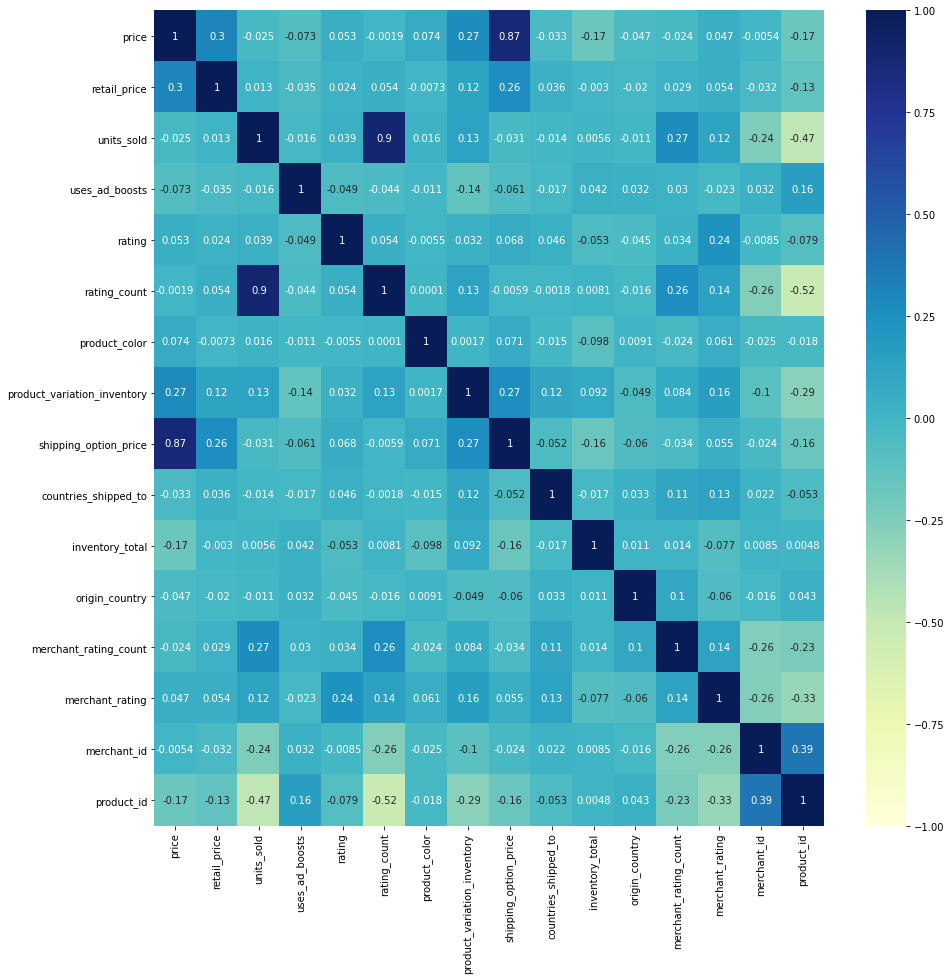

In [22]:
corr = sales_data.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='YlGnBu', annot=True)
plt.show()

In [23]:
sales_data

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,product_color,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,origin_country,merchant_rating_count,merchant_rating,merchant_id,product_id
0,16.00,14,100,0,3.76,54,0,50,4,34,50,0,568,4.128521,533,1051
1,8.00,22,20000,1,3.45,6135,1,50,2,41,50,0,17752,3.899673,143,62
2,8.00,43,100,0,3.57,14,2,1,3,36,50,0,295,3.989831,808,1086
3,8.00,8,5000,1,4.03,579,3,50,2,41,50,0,23832,4.020435,465,547
4,2.72,3,100,1,3.10,20,4,1,1,35,50,0,14482,4.001588,640,1221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,6.00,9,10000,1,4.08,1367,5,50,2,41,50,0,5316,4.224605,729,739
1569,2.00,56,100,1,3.07,28,9,2,1,26,50,0,4435,3.696054,74,1266
1570,5.00,19,100,0,3.71,59,0,15,2,11,50,0,210,3.961905,724,948
1571,13.00,11,100,0,2.50,2,0,36,3,29,50,0,31,3.774194,843,1303


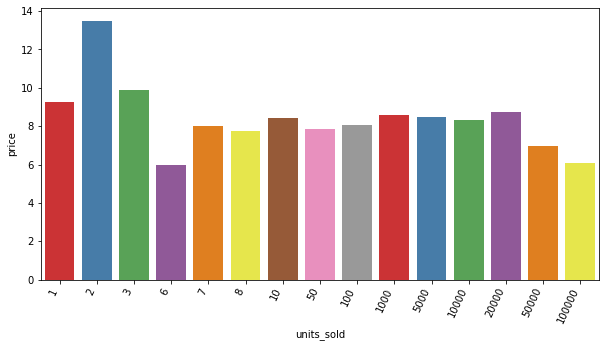

In [24]:
plt.figure(figsize=(10,5))
ax = sns.barplot(y="price", x="units_sold", data=sales_data, palette='Set1',ci=None)
ax=ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 )

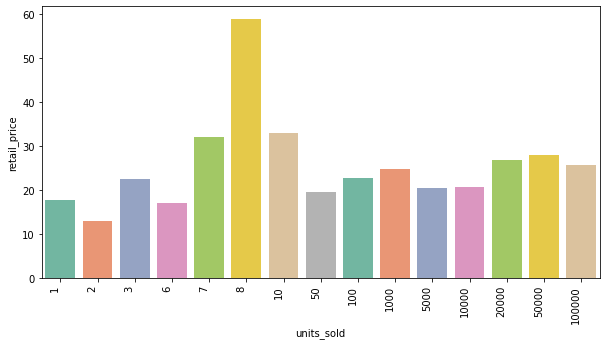

In [25]:
plt.figure(figsize=(10,5))
bx = sns.barplot(y=sales_data['retail_price'], x=sales_data['units_sold'],palette='Set2',ci=None)
bx=bx.set_xticklabels(
    bx.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
)

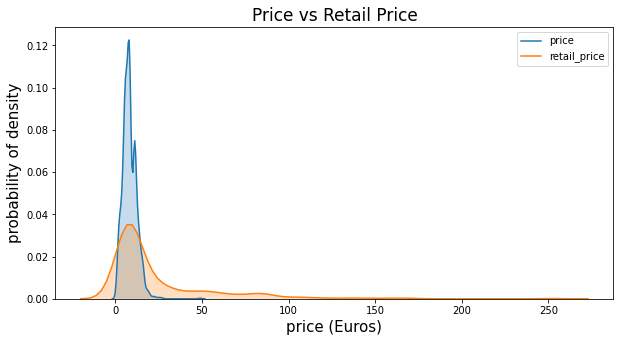

In [26]:
plt.figure(figsize=(10, 5))
sns.kdeplot(sales_data['price'], shade=True)
sns.kdeplot(sales_data['retail_price'], shade=True)
plt.xlabel('price (Euros)', fontsize=15)
plt.ylabel('probability of density', fontsize=15)
plt.title("Price vs Retail Price", fontsize=17)
plt.show()

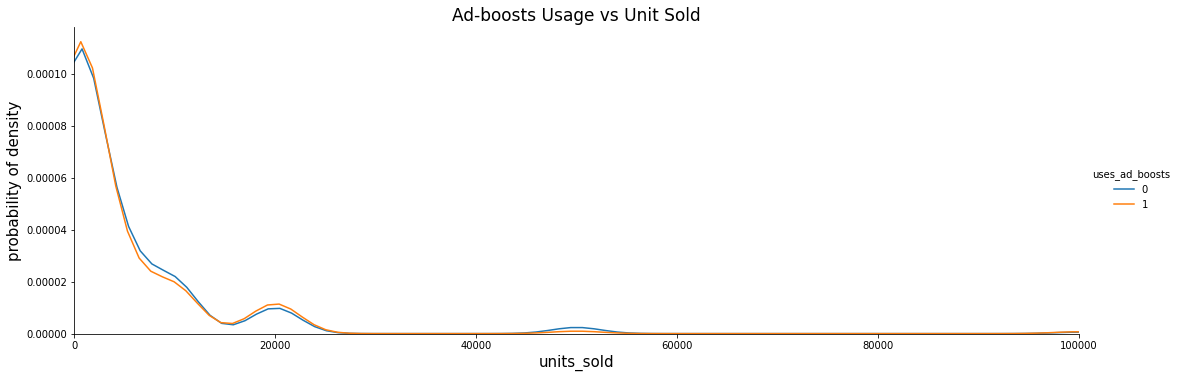

In [27]:
g = sns.FacetGrid(sales_data, hue='uses_ad_boosts', height=5, aspect=3)

g = (g.map(sns.kdeplot, 'units_sold', shade=False).add_legend())
max_units = sales_data['units_sold'].max()
g.set(xlim=(0, max_units))
plt.title('Ad-boosts Usage vs Unit Sold', fontsize=17)
plt.xlabel('units_sold', fontsize=15)
plt.ylabel('probability of density', fontsize=15)
plt.show()

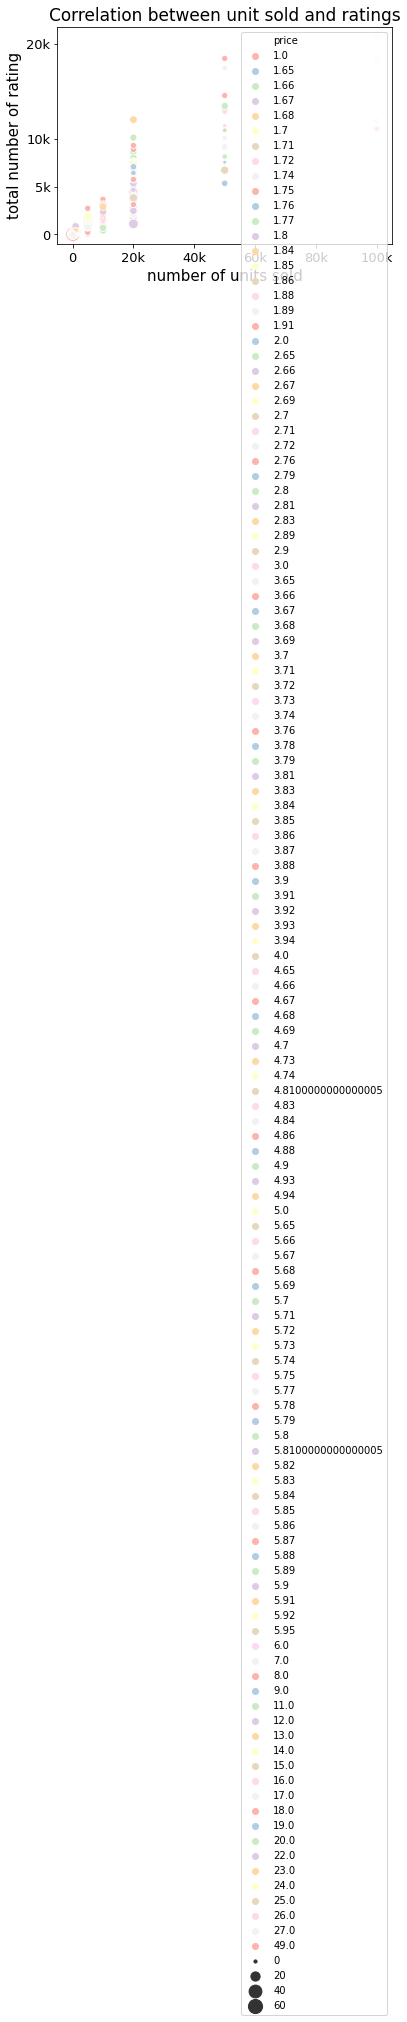

In [28]:
sns.scatterplot(x='units_sold', y='rating_count', hue='price', 
                palette='Pastel1', size='price', sizes=(10, 200), data=sales_data)
plt.xlabel("number of units sold", fontsize=15)
plt.ylabel("total number of rating", fontsize=15)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20k', '40k', '60k', '80k', '100k'], 
           fontsize=13)
plt.yticks([0, 5000, 10000, 20000], ['0', '5k', '10k', '20k'], fontsize=13)
plt.title("Correlation between unit sold and ratings", fontsize=17)
plt.show()

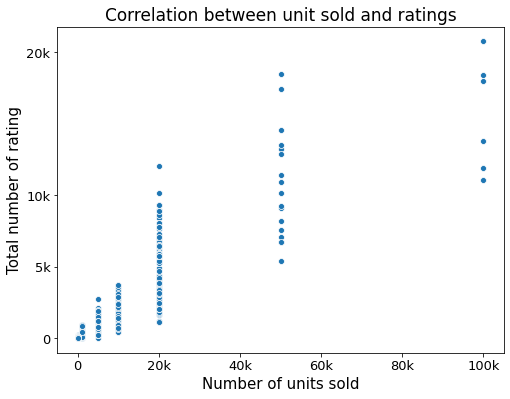

In [29]:
plt.figure(figsize=(8, 6))

sns.scatterplot(y='rating_count', x='units_sold', 
                palette='Pastel1',  sizes=(10, 200), data=sales_data)
plt.xlabel("Number of units sold", fontsize=15)
plt.ylabel("Total number of rating", fontsize=15)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20k', '40k', '60k', '80k', '100k'], 
           fontsize=13)
plt.yticks([0, 5000, 10000, 20000], ['0', '5k', '10k', '20k'], fontsize=13)
plt.title("Correlation between unit sold and ratings", fontsize=17)
plt.show()


Text(0.5, 1.0, 'Variation Inventory vs Sale')

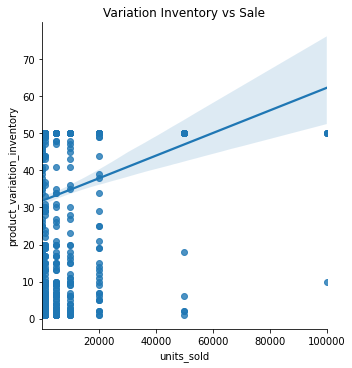

In [30]:
sns.lmplot('units_sold','product_variation_inventory',data=sales_data)
plt.title('Variation Inventory vs Sale')

Text(0.5, 1.0, 'Rating vs Merchant')

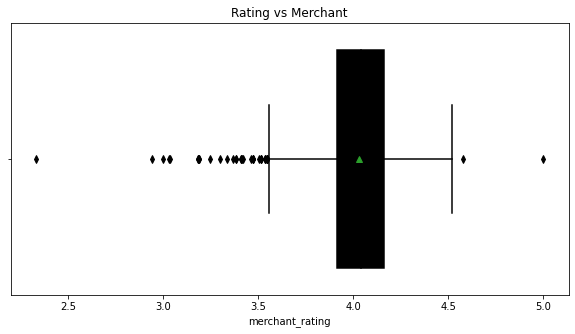

In [31]:
sns.boxplot(sales_data['merchant_rating'],color='black',showmeans=True)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('Rating vs Merchant')

Text(0.5, 1.0, 'Country of Product Origin')

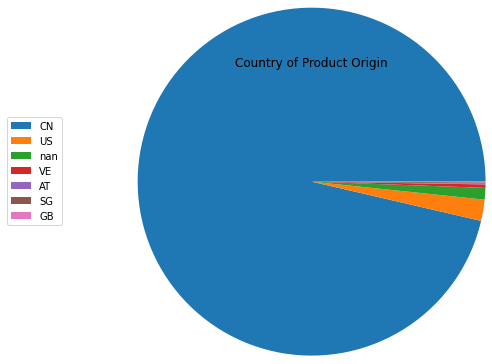

In [32]:
s = sales_data.groupby('origin_country')['origin_country'].count()
plt.pie(s,radius=2)
plt.legend(raw_sales_data['origin_country'].unique(),loc=(-0.9,0.3))
plt.title('Country of Product Origin')

Text(0.5, 1.0, 'Ratings VS Units Sold')

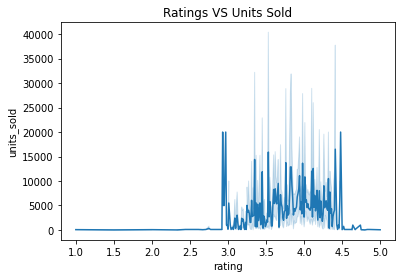

In [33]:
sns.lineplot(sales_data['rating'],sales_data['units_sold'])
plt.title('Ratings VS Units Sold')

# Feature Scaling

In [34]:
standard_scaler = StandardScaler()
scaled_sales_data = standard_scaler.fit_transform(sales_data)

In [35]:
train_columns = sales_data.columns.drop(labels='units_sold')
train_sales_data = sales_data[train_columns]

In [36]:
train_sales_data

,price,retail_price,uses_ad_boosts,rating,rating_count,product_color,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,origin_country,merchant_rating_count,merchant_rating,merchant_id,product_id
0,16.00,14,0,3.76,54,0,50,4,34,50,0,568,4.128521,533,1051
1,8.00,22,1,3.45,6135,1,50,2,41,50,0,17752,3.899673,143,62
2,8.00,43,0,3.57,14,2,1,3,36,50,0,295,3.989831,808,1086
3,8.00,8,1,4.03,579,3,50,2,41,50,0,23832,4.020435,465,547
4,2.72,3,1,3.10,20,4,1,1,35,50,0,14482,4.001588,640,1221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,6.00,9,1,4.08,1367,5,50,2,41,50,0,5316,4.224605,729,739
1569,2.00,56,1,3.07,28,9,2,1,26,50,0,4435,3.696054,74,1266
1570,5.00,19,0,3.71,59,0,15,2,11,50,0,210,3.961905,724,948
1571,13.00,11,0,2.50,2,0,36,3,29,50,0,31,3.774194,843,1303


In [37]:
train_scaled_sales_df = pd.DataFrame(train_sales_data, columns = train_columns)

# ML Models

In [38]:
X_train, X_test, y_train, y_test = train_test_split(train_scaled_sales_df, sales_data['units_sold'], test_size=0.2, random_state=0)

### Linear Regression Model

In [39]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
linear_reg_model_prediction = linear_reg_model.predict(X_test)

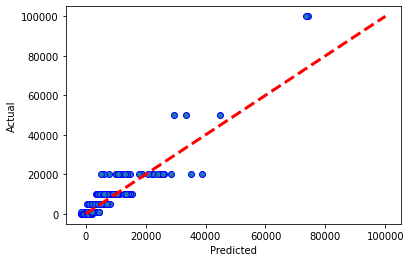

In [41]:
fig, ax = plt.subplots()
ax.scatter(linear_reg_model_prediction, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [42]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

In [43]:
y_test = np.array(y_test).reshape(-1,1)

In [44]:
cross_val_score(linear_reg_model, y_test, linear_reg_model_prediction, cv=kfold, scoring = 'neg_mean_absolute_error')

array([-1560.38213674, -1905.74137582, -1376.10731629, -1367.27747666,
       -1565.12169246, -1217.43409802, -1564.01865122, -1222.12413079,
       -3456.69303861, -1214.27453589])

In [45]:
lr_mae = metrics.mean_absolute_error(y_test, linear_reg_model_prediction)
lr_mse = metrics.mean_squared_error(y_test, linear_reg_model_prediction)
lr_r2 = metrics.r2_score(y_test, linear_reg_model_prediction)

In [46]:
print(f'Mean Absolute Error: {lr_mae}')
print(f'Mean Squared Error: {lr_mse}')
print(f'R-square value: {lr_r2}')

Mean Absolute Error: 2026.2300233028882
Mean Squared Error: 15863914.725465957
R-square value: 0.8578302296650405


### Decision Tree Regressor

In [47]:
decision_tree_regression_model = DecisionTreeRegressor(random_state=0)
decision_tree_regression_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [48]:
decision_tree_regression_model_prediction = decision_tree_regression_model.predict(X_test)

In [49]:
dt_mae = metrics.mean_absolute_error(y_test, decision_tree_regression_model_prediction)
dt_mse = metrics.mean_squared_error(y_test, decision_tree_regression_model_prediction)
dt_r2 = metrics.r2_score(y_test, decision_tree_regression_model_prediction)

In [50]:
print(f'Mean Absolute Error: {dt_mae}')
print(f'Mean Squared Error: {dt_mse}')
print(f'R-square value: {dt_r2}')

Mean Absolute Error: 1504.4603174603174
Mean Squared Error: 28143094.44126984
R-square value: 0.747786259415052


### Random Forest Regressor

In [51]:
random_forest_regression_model = RandomForestRegressor(random_state=0)
random_forest_regression_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [52]:
random_forest_regression_model_prediction = random_forest_regression_model.predict(X_test)

In [53]:
rf_mae = metrics.mean_absolute_error(y_test, random_forest_regression_model_prediction)
rf_mse = metrics.mean_squared_error(y_test, random_forest_regression_model_prediction)
rf_r2 = metrics.r2_score(y_test, random_forest_regression_model_prediction)

In [54]:
print(f'Mean Absolute Error: {rf_mae}')
print(f'Mean Squared Error: {rf_mse}')
print(f'R-square value: {rf_r2}')

Mean Absolute Error: 1643.6422222222222
Mean Squared Error: 25635655.989695236
R-square value: 0.7702575065793573


### XGBoost Regressor

In [55]:
xgb_regression_model = XGBRegressor(learning_rate=0.25, n_estimators =200)
xgb_regression_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [56]:
xgb_regression_model_prediction = xgb_regression_model.predict(X_test)

In [57]:
xgb_mae = metrics.mean_absolute_error(y_test, xgb_regression_model_prediction)
xgb_mse = metrics.mean_squared_error(y_test, xgb_regression_model_prediction)
xgb_r2 = metrics.r2_score(y_test, xgb_regression_model_prediction)

In [58]:
print(f'Mean Absolute Error: {xgb_mae}')
print(f'Mean Squared Error: {xgb_mse}')
print(f'R-square value: {xgb_r2}')

Mean Absolute Error: 1527.104072354332
Mean Squared Error: 28232354.678006273
R-square value: 0.746986323990759


### XGBoost Random Forest Regressor

In [59]:
xgbrf_regression_model = XGBRFRegressor(random_state=0)
xgbrf_regression_model.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=0.8, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=1, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               reg_lambda=1e-05, scale_pos_weight=1, subsample=0.8,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
xgbrf_regression_model_prediction = xgbrf_regression_model.predict(X_test)

In [61]:
xgbrf_mae = metrics.mean_absolute_error(y_test, xgbrf_regression_model_prediction)
xgbrf_mse = metrics.mean_squared_error(y_test, xgbrf_regression_model_prediction)
xgbrf_r2 = metrics.r2_score(y_test, xgbrf_regression_model_prediction)

In [62]:
print(f'Mean Absolute Error: {xgbrf_mae}')
print(f'Mean Squared Error: {xgbrf_mse}')
print(f'R-square value: {xgbrf_r2}')

Mean Absolute Error: 1776.671016681005
Mean Squared Error: 27239141.74844511
R-square value: 0.7558873333905858


In [63]:
evaluation_metrics = {
    'Mean Absolute Error':[lr_mae,dt_mae,rf_mae,xgb_mae,xgbrf_mae],
    'Mean Squared Error':[lr_mse,dt_mse,rf_mse,xgb_mse,xgbrf_mse],
    'R square':[lr_r2,dt_r2,rf_r2,xgb_r2,xgbrf_r2]
}
evaluation_metrics_names = pd.Series(['Linear Regression',
                            'Decision Tree Regressor',
                            'Random Forest',
                            'XGBoost Regressor',
                            'XGBoost Random Forest Regressor'], name='Model Names')
evaluation_metrics_df = pd.DataFrame(evaluation_metrics, columns=evaluation_metrics.keys())
evaluation_metrics_df = evaluation_metrics_df.join(evaluation_metrics_names)

#### Mean Absolute Error

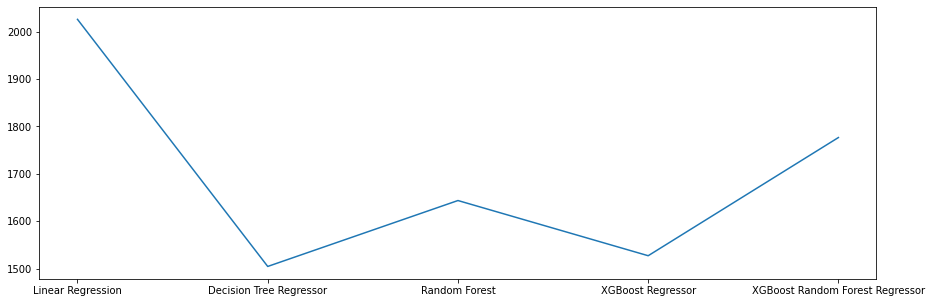

In [64]:
plt.figure(figsize=(15,5))
plt.plot(evaluation_metrics_df['Model Names'],evaluation_metrics_df['Mean Absolute Error'])
plt.show()

#### Mean Squared Error

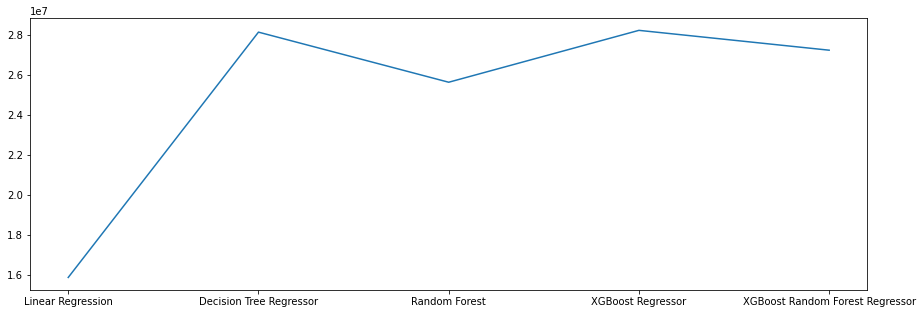

In [65]:
plt.figure(figsize=(15,5))
plt.plot(evaluation_metrics_df['Model Names'],evaluation_metrics_df['Mean Squared Error'])
plt.show()

#### R square

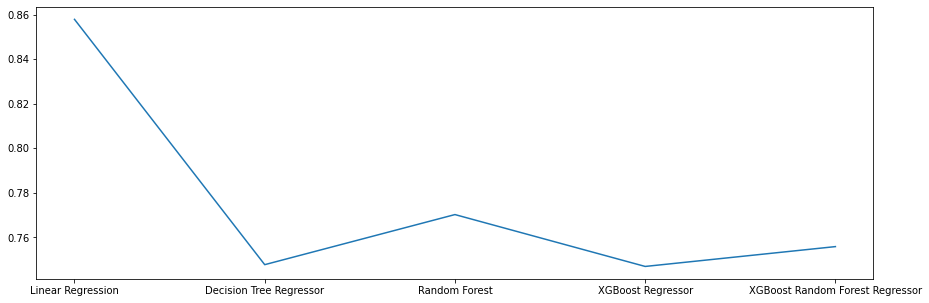

In [66]:
plt.figure(figsize=(15,5))
plt.plot(evaluation_metrics_df['Model Names'], evaluation_metrics_df['R square'])